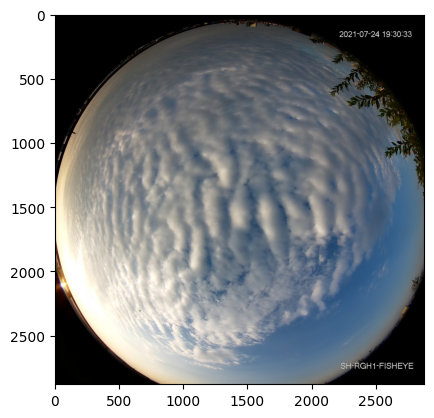

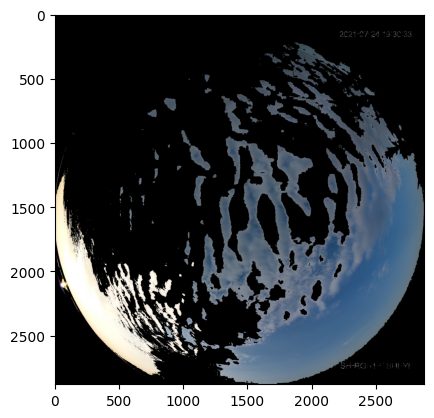

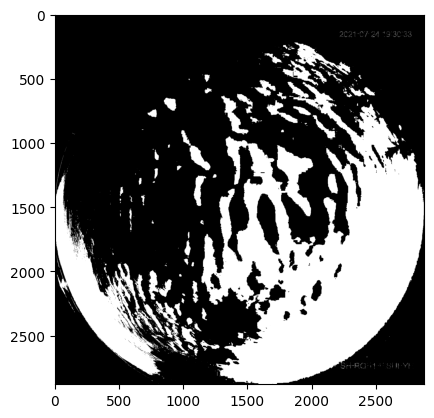

In [53]:
# https://www.researchgate.net/publication/227860342_Cloud_Detection_and_Classification_with_the_Use_of_Whole-Sky_Ground-Based_Images

import cv2
import matplotlib.pyplot as plt
import numpy as np

file = 'frames\partially_cloudy_low.jpg'
file = 'frames\partially_cloudy_med.jpg'
#file = 'frames\heavy_cloud.jpg'
#file = 'frames\clear_sun.jpg'

# Load the image
img = cv2.imread(file)
plt.figure()
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

# Split the image into its channels
b, g, r = cv2.split(img)
r_20 = r + 20
g_20 = g + 20

cloud_mask1 = np.where(b < r_20, 255, 0).astype(np.uint8)
cloud_mask2 = np.where(b < g_20, 255, 0).astype(np.uint8)
cloud_mask3 = np.where(b < 60, 255, 0).astype(np.uint8)

# Combine the two masks
mask = cv2.bitwise_and(cloud_mask1, cloud_mask2, cloud_mask3)
mask_inverted = cv2.bitwise_not(mask)

thresholded_img = cv2.bitwise_and(img, img, mask=mask_inverted)
RGB_img = cv2.cvtColor(thresholded_img, cv2.COLOR_BGR2RGB)

# Show the result
plt.figure()
plt.imshow(RGB_img)
plt.figure()
plt.imshow(mask_inverted, cmap='gray')
